# **Exploratory analysis**

## Objectives

* Perform additional exploratory data analysis to understand data distribution and correlations between variables.

## Inputs

* Cleaned data saved in https://github.com/8osco/academic_performance_analysis/blob/main/data/inputs/cleaned/edu_data_cleaned.csv
* Initial analyses performed in [1_data_etl.ipynb](https://github.com/8osco/academic_performance_analysis/blob/main/jupyter_notebooks/1_data_etl.ipynb)


## Outputs

* Overview on data distribution and correlations between variables.

# 1 Import packages


Import relevant packages required for data analysis and visualisation.

In [1]:
# Import NumPy, Pandas, Matplotlib, Seaborn and Plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2 Data extract and familiarisation

Read in the cleaned csv file and familiarise with the file structure at a high level, through use of various dataframe methods:

In [2]:
# Load the dataset and display the first few rows
df = pd.read_csv('../data/inputs/cleaned/edu_data_cleaned.csv')
df.head()

,gender,nationality,place_of_birth,education_stage,grade,classroom_id,subject,semester,parent_involved,raised_hands,resource_visits,announcements_viewed,discussion_participation,parent_answered_survey,parent_school_satisfaction,absence_category,pass_fail_status
0,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,15,16,2,20,yes,good,low,pass
1,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,20,20,3,25,yes,good,low,pass
2,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,10,7,0,30,no,bad,high,fail
3,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,30,25,5,35,no,bad,high,fail
4,male,kuwait,kuwait,lowerschool,g-04,a,it,first,father,40,50,12,50,no,bad,high,pass


In [3]:
# Display the shape of the DataFrame
df.shape

(478, 17)

In [4]:
# Display the column data types and check for null or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   gender                      478 non-null    object
 1   nationality                 478 non-null    object
 2   place_of_birth              478 non-null    object
 3   education_stage             478 non-null    object
 4   grade                       478 non-null    object
 5   classroom_id                478 non-null    object
 6   subject                     478 non-null    object
 7   semester                    478 non-null    object
 8   parent_involved             478 non-null    object
 9   raised_hands                478 non-null    int64 
 10  resource_visits             478 non-null    int64 
 11  announcements_viewed        478 non-null    int64 
 12  discussion_participation    478 non-null    int64 
 13  parent_answered_survey      478 non-null    object

# 3 Ydata profiling report

We will start with a quick exploratory data analysis using ydata profiling, as it is quite easy and it generates nice report on all columns.  We will need to install and upgrade the packages first.

In [ ]:
# Install ydata profiling
%pip install ydata-profiling

In [ ]:
# Upgrade packages
%pip install --upgrade ydata-profiling pandas numpy ipywidgets ipython jupyter

In [7]:
# Import display function to show the profile report in Jupyter Notebook
from IPython.display import display

In [8]:
# Import ydata profiling and generate a profile report
from ydata_profiling import ProfileReport
profile = ProfileReport(df=df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 545.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This report can't be viewed on GitHub directly and research suggests that it can be saved as html for viewing as follows.

In [9]:
profile_h = ProfileReport(df, minimal=True)

# Save to HTML file
profile_h.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 373.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The html report is available for download only and can be made viewable on "GitHub page" (https://pages.github.com/).

This has been set up following the instructions and here is the link to the y_profiling report: https://8osco.github.io/

### Observations:

Main observations from the y-profiling report:

1) There was an alert that three columns have zero values.  The report shows that this includes the raised_hands column.  This is reasonable and also for the other columns that were flagged
2) Male and female is approximately 60:40 split
3) Most of the nationalities are Kuwait and Jordan, which combines to over 70% of the total dataset population.  This is similar on the 'place of birth' count
4) The majority of the students are in lower or middle schools.  Only c.7% in the high school.
5) Grade distribution does not provide a great deal of insight, although this is likely to be linked to the education_stage column.  The relationship between them, together with classroom_id and subject can be assessed later.
6) The two semesters have fairly even number of students.
7) All students have parent involved and there were slightly more fathers involved than mums, 59% vs 41%.  However, not all parents answered the school surveys or satisfied with the school.  The relationships can be explored later.
8) Students' participation, measured by hand raising, resource visited, announcement viewed and discussion participated, all have quite different distributions.  The most similar ones are hand raising and discussion participated based on visualising the charts alone.  We can investigate these patterns later also.
9) Absence record split between low and high is roughly 60:40.
10) Pass/Fail split is roughly 75:25.  This is quite uneven and could potentially have an impact on accuracy of machine learning model.

# 4 Exploring relationships between independent variables

There were 3 areas identified above which we would like to explore further, which we will use charts to help visualise.


1) Relationships between education_stage, grade and classroom_id

We will use catplot in Seaborn here, which is useful for comparing amongst categorical variables.

In [10]:
# This command was found to be required to display seaborn plots below
%matplotlib inline

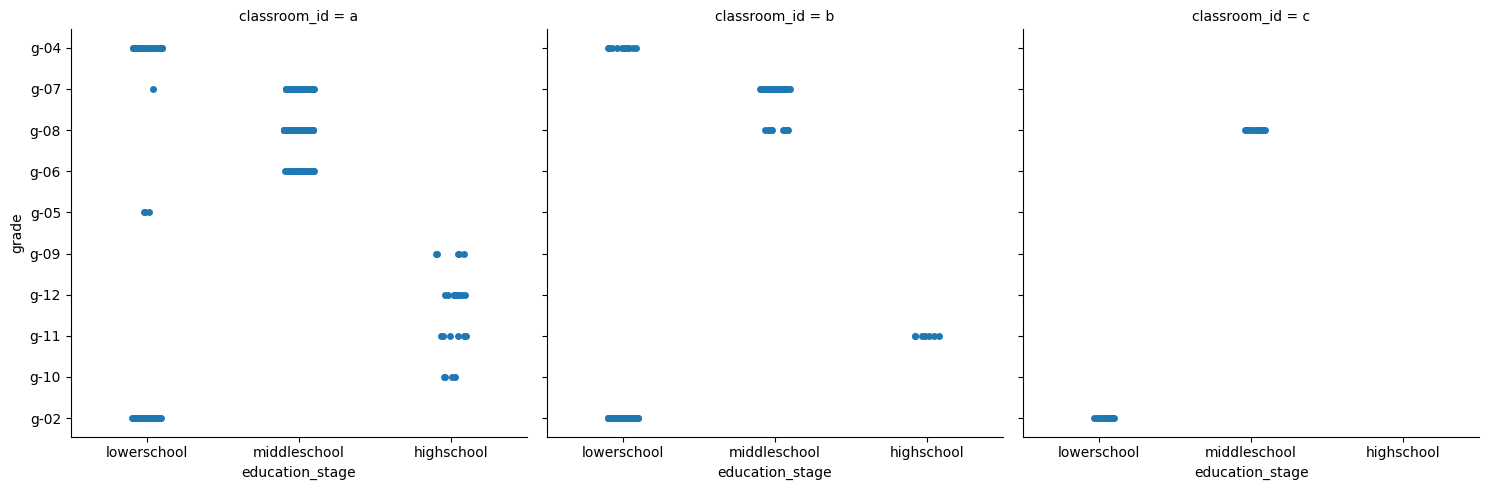

In [11]:
# Seaborn categorical plot
sns.catplot(
    data=df,
    x="education_stage",
    y="grade",
    col="classroom_id",
)

plt.show()  

The charts have been set out the way we wanted, but the 'grade' ordering which was done in the data cleaning stage (see 1_data_etl.ipynb) has not been picked up.  The ordering seems to have lost when we used a new dataframe that was created from the cleaned and ordered csv file.  The code for categorical ordering is re-run again and the charts are re-plotted below.

In [12]:
# Re-run the categorical ordering code to ensure e.g. the 'grade' variable is ordered correctly
# Import CategoricalDtype from pandas.api.types for ordered categorical data
from pandas.api.types import CategoricalDtype

# Define ordered categories
ordered_categories = {
    "gender": ["female", "male"],
    "education_stage": ["lowerschool", "middleschool", "highschool"],
    "grade": [
        "g-01", "g-02", "g-03", "g-04", "g-05", "g-06",
        "g-07", "g-08", "g-09", "g-10", "g-11", "g-12"
    ],
    "classroom_id": ["a", "b", "c"],
    "semester": ["first", "second"],
    "parent_involved": ["father", "mum"], # corrected from 'mother' to 'mum'
    "parent_answered_survey": ["no", "yes"],
    "parent_school_satisfaction": ["bad", "good"],
    "absence_category": ["low", "high"],
    "pass_fail_status": ["pass", "fail"]
}

# Convert to ordered categorical data types
for col, categories in ordered_categories.items():
    cat_type = CategoricalDtype(categories=categories, ordered=True)
    df[col] = df[col].astype(cat_type)

# subject, nationality and place_of_birth are ordered alphabetically
for col in ["subject", "nationality", "place_of_birth"]:
    ordered_alph = sorted(df[col].unique())
    df[col] = df[col].astype(CategoricalDtype(categories=ordered_alph, ordered=True))

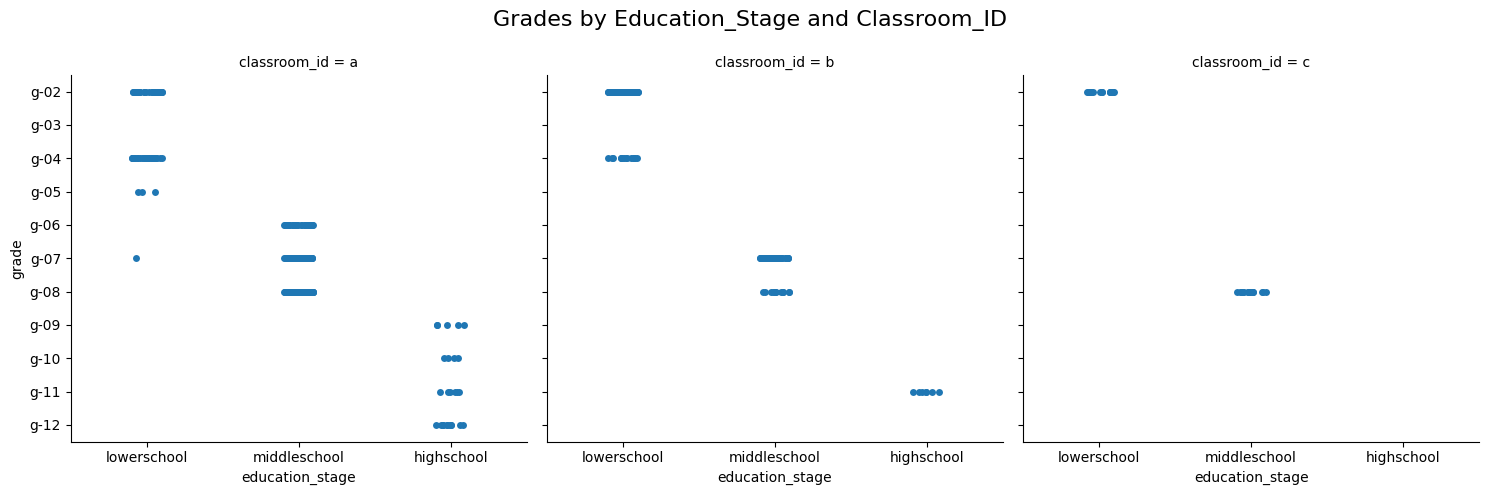

In [13]:
# Re-plot the catplot with the ordered categories
plot_a = sns.catplot(
    data=df,
    x="education_stage",
    y="grade",
    col="classroom_id",
)

plot_a.fig.suptitle("Grades by Education_Stage and Classroom_ID", fontsize=16) # add title
plot_a.fig.subplots_adjust(top=0.85) # adjust title position to avoid overlap with charts

plt.show()

To confirm that there is only one point in g-07 in lowerschool and in classroom "a":

In [14]:
count = (
    df[df["grade"] == "g-07"]   # Filter for grade 'g-07'
    .groupby(["classroom_id", "education_stage"], # Group by classroom_id and education_stage
             observed=True) # Observed=True to avoid empty groups
    .size() # Count occurrences
    .get(("a", "lowerschool"), 0)  # Get count for 'a' classroom in 'lowerschool' stage, default to 0 if not found
)
print(f"Count of 'g-07' in 'lowerschool' classroom 'a': {count}") # print the count

Count of 'g-07' in 'lowerschool' classroom 'a': 1


Showing details of this record:

In [15]:
df[
    (df["grade"] == "g-07") & # Filter for grade 'g-07'
    (df["classroom_id"] == "a") & # Filter for classroom 'a'
    (df["education_stage"] == "lowerschool") # Filter for education stage 'lowerschool'
]

,gender,nationality,place_of_birth,education_stage,grade,classroom_id,subject,semester,parent_involved,raised_hands,resource_visits,announcements_viewed,discussion_participation,parent_answered_survey,parent_school_satisfaction,absence_category,pass_fail_status
32,female,kuwait,kuwait,lowerschool,g-07,a,it,first,father,2,19,10,50,yes,good,high,fail


### Observations:

A pivot table would probably be better for visualising the relationships, providing the counts in each group also.  The catplot does provide a high level view of the relationships nevertheless as follows.

Grade and education stage are linked as we previously thought by and large, lower grades relate to the lower school for example.  The border between lower and middle school is slightly blurred by the fact that we have one record in the lower school in grade g-07, which appears in middle school also.  It appears that this could be a typo, although we cannot verify based on the information on the record alone.  This needs to be taken care of if we want to use the grade variable to develop prediction model.

Classroom_id bears no apparent relationship to either of the two other variables based on the charts.

2) Parent_involved, parent_answered_survey, parent_school_satisfaction

We will use Plotly histogram for its relatively simple code, and histogram is easy to visualise and discover patterns.

In [16]:
plot_b = px.histogram(
    df,
    x="parent_school_satisfaction",  # x-axis variable
    color="parent_involved",  # legend grouping
    barmode="group",          # or "overlay" for overlapping bars
    facet_col="parent_answered_survey",  # split by parent answered survey
    title="Parent Survey Answers by Involvement and Satisfaction",
)

plot_b.update_layout(
    xaxis_title="parent_school_satisfaction",
    yaxis_title="Number of students",
    legend_title="Parent Involved",
    bargap=0.2
)

plot_b.show()

c:\Users\L30SC\Documents\CI\VScode-projects\academic_performance_analysis\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


Since the Plotly chart cannot be seen directly on Github.  A screenshot of the chart has been saved in:

https://github.com/8osco/academic_performance_analysis/blob/main/pictures/relationships_between_parent_variables.jpg

### Observations:

Where parents had answered the survey, similar satisfaction levels can be observed regardless of which parent was involved.  The difference is more pronounced where parents did not answered the survey, there were a lot more fathers than mums who were not satisfied with the school.  This can be further investigated to see if this is associated with the underlying student performance.

3) Students' participation, measured by hand raising, resource visited, announcement viewed and discussion participated

These are the numerical variables and we can explore with correlation heatmap in Seaborn.

Pearson method was chosen to help identify if the relationships are linear.

In [17]:
df_numeric = df.select_dtypes(include='int64') # Select all numeric columns
df_corr = df_numeric.corr(method='pearson') # use Pearson correlation method to calculate correlation
df_corr

,raised_hands,resource_visits,announcements_viewed,discussion_participation
raised_hands,1.000000,0.690635,0.642730,0.337300
resource_visits,0.690635,1.000000,0.592948,0.238790
announcements_viewed,0.642730,0.592948,1.000000,0.415355
discussion_participation,0.337300,0.238790,0.415355,1.000000


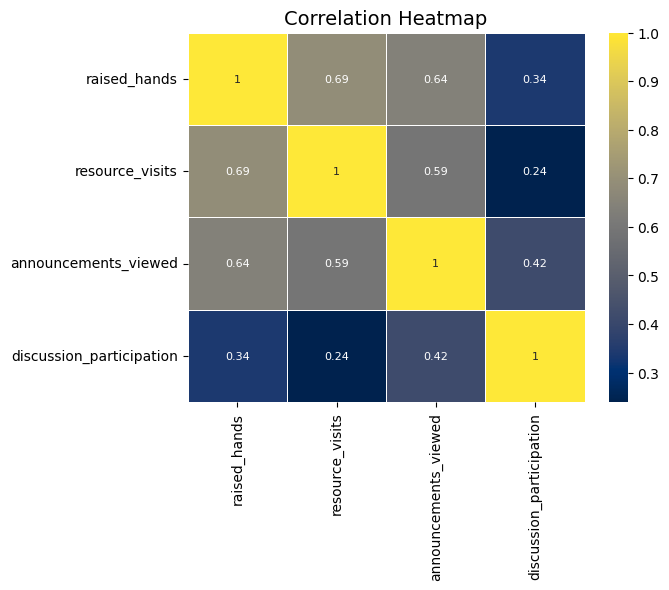

In [18]:
# Create a heatmap of the correlation matrix
sns.heatmap(data=df_corr, 
            annot=True, # Use annotations to show correlation values
            linewidths=0.5, # Add lines between cells
            annot_kws={"size": 8}, # Adjust annotation size
            cmap='cividis', # Set the colormap to 'cividis' which is colorblind-friendly
            ) 

plt.title("Correlation Heatmap", fontsize=14) # Add title
plt.show()


### Observations:

Hand raising are correlated to resource visited, announcement viewed to some degree, given the correlation values are around 60-70%.  Hand raising and discussion participated are not very correlated on the other hand, although their distributions have some resemblance of each other as we saw earlier.

Grade or education stage could potentially play a part, e.g. younger students could raise hands more often but view less announcements or participate in fewer discussions.  These can be explored further.

# 5 Summary 

Exploratory data analysis was performed above to help visualise data pattern and identify relationships between the independent variables.  This can help form views on e.g. feature selection to help improve model efficiency and reduce model overfitting.  

Grade, for example, is a potential feature to drop given the direct linkage to education_stage.  However, correlation with the target variable (pass/fail) and therefore relevance of the features for prediction would also need to be taken into account.

We will proceed with hypothesis testing next to examine relationships between features and the target variable.